# Analyse Exploratoire du fichier myreport_sql_lock_full.csv

### Imports (fichier & modules)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [3]:
tab = pd.read_csv('../data/logServer/myreport_sql_lock_full.csv', sep=',', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

### Le fichier myreport_sql_lock_full.csv

In [4]:
print("il y a ",tab.shape[0]," lignes et ",tab.shape[1]," colonnes dans le data frame")

il y a  2882  lignes et  12  colonnes dans le data frame


In [5]:
tab.columns

Index(['Date et heure', 'Date et heure(RAW)',
       'Nombre de requêtes de verrouillage/s',
       'Nombre de requêtes de verrouillage/s(RAW)', 'Temps d'attente moyen',
       'Temps d'attente moyen(RAW)', 'Nombre de blocages/s',
       'Nombre de blocages/s(RAW)', 'Temps mort', 'Temps mort(RAW)',
       'Couverture', 'Couverture(RAW)'],
      dtype='object')

In [6]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2882 entries, 0 to 2881
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date et heure                              2882 non-null   object 
 1   Date et heure(RAW)                         2881 non-null   float64
 2   Nombre de requêtes de verrouillage/s       2195 non-null   object 
 3   Nombre de requêtes de verrouillage/s(RAW)  2194 non-null   float64
 4   Temps d'attente moyen                      2195 non-null   object 
 5   Temps d'attente moyen(RAW)                 2194 non-null   float64
 6   Nombre de blocages/s                       2192 non-null   object 
 7   Nombre de blocages/s(RAW)                  2194 non-null   float64
 8   Temps mort                                 2195 non-null   object 
 9   Temps mort(RAW)                            2194 non-null   float64
 10  Couverture              

In [7]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Date et heure                                2882
Date et heure(RAW)                           2881
Nombre de requêtes de verrouillage/s         1122
Nombre de requêtes de verrouillage/s(RAW)    2194
Temps d'attente moyen                         305
Temps d'attente moyen(RAW)                    471
Nombre de blocages/s                            1
Nombre de blocages/s(RAW)                       2
Temps mort                                      1
Temps mort(RAW)                                 1
Couverture                                      3
Couverture(RAW)                                 2
dtype: int64


In [8]:
tab.head()


,Date et heure,Date et heure(RAW),Nombre de requêtes de verrouillage/s,Nombre de requêtes de verrouillage/s(RAW),Temps d'attente moyen,Temps d'attente moyen(RAW),Nombre de blocages/s,Nombre de blocages/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW)
0,13/08/2024 00:00:00 - 01:00:00,45516.958333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
1,13/08/2024 01:00:00 - 02:00:00,45517.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 %,0.0
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,708 #,708.1192,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,56 #,56.1687,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,142 #,142.3510,0 ms,0.0,0 #,0.0,0 %,0.0,100 %,10000.0


### Suppression des valeurs NaN

In [9]:
num_deleted = tab.shape[0]
tab.dropna(inplace=True)
num_deleted -= tab.shape[0]

print(f"Number of rows deleted: {num_deleted}")

Number of rows deleted: 690


In [10]:
from datetime import datetime, timedelta

def from_excel_ordinal(ordinal, epoch=datetime(1900, 1, 1)):
    # Adapted from above, thanks to @Martijn Pieters 

    if ordinal > 59:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    inDays = int(ordinal)
    frac = ordinal - inDays
    inSecs = int(round(frac * 86400.0))

    return epoch + timedelta(days=inDays - 1, seconds=inSecs) # epoch is day 1

excelDT = 42548.75001           # Float representation of 27/06/2016  6:00:01 PM in Excel format  
pyDT = from_excel_ordinal(excelDT)
print(pyDT)

2016-06-27 18:00:01


In [11]:
# Convertir toutes les dates de la colonne 'Date et heure(RAW)'
tab['date_full'] = tab['Date et heure(RAW)'].apply(from_excel_ordinal)

# Extraire la date et l'heure sous forme de colonnes séparées
tab['date'] = tab['date_full'].dt.strftime("%Y-%m-%d")  # Format YY-MM-DD
tab['heure'] = tab['date_full'].dt.strftime("%H")  # Format HH

In [12]:
tab.head()


,Date et heure,Date et heure(RAW),Nombre de requêtes de verrouillage/s,Nombre de requêtes de verrouillage/s(RAW),Temps d'attente moyen,Temps d'attente moyen(RAW),Nombre de blocages/s,Nombre de blocages/s(RAW),Temps mort,Temps mort(RAW),Couverture,Couverture(RAW),date_full,date,heure
2,13/08/2024 02:00:00 - 03:00:00,45517.041667,708 #,708.1192,0 ms,0.0000,0 #,0.0,0 %,0.0,100 %,10000.0,2024-08-13 01:00:00,2024-08-13,01
3,13/08/2024 03:00:00 - 04:00:00,45517.083333,56 #,56.1687,0 ms,0.0000,0 #,0.0,0 %,0.0,100 %,10000.0,2024-08-13 02:00:00,2024-08-13,02
4,13/08/2024 04:00:00 - 05:00:00,45517.125000,142 #,142.3510,0 ms,0.0000,0 #,0.0,0 %,0.0,100 %,10000.0,2024-08-13 03:00:00,2024-08-13,03
5,13/08/2024 05:00:00 - 06:00:00,45517.166667,853 #,852.5260,15 ms,14.6667,0 #,0.0,0 %,0.0,100 %,10000.0,2024-08-13 04:00:00,2024-08-13,04
6,13/08/2024 06:00:00 - 07:00:00,45517.208333,1 469 #,1469.1254,28 ms,27.9167,0 #,0.0,0 %,0.0,100 %,10000.0,2024-08-13 05:00:00,2024-08-13,05


In [13]:
# déplacement des nouvelles colonnes de date/heure à gauche
cols = tab.columns  # Liste des colonnes
tab = tab[cols[-3:].tolist() + cols[:-3].tolist()]

In [14]:
# suppression des colonnes inutiles
tab = tab.drop(columns=["Date et heure"])
tab = tab.drop(columns=["Nombre de requêtes de verrouillage/s"])
tab = tab.drop(columns=["Temps d'attente moyen"])
tab = tab.drop(columns=["Nombre de blocages/s"])
tab = tab.drop(columns=["Temps mort"])
tab = tab.drop(columns=["Temps mort(RAW)"])
tab = tab.drop(columns=["Couverture"])
tab = tab.drop(columns=["Couverture(RAW)"])


# renommage des colonnes
tab.rename(columns={"": ""}, inplace=True)
tab.rename(columns={"Nombre de requêtes de verrouillage/s(RAW)": "requete_verrouillage(n/s)"}, inplace=True)
tab.rename(columns={"Temps d'attente moyen(RAW)": "temps_attente(ms)"}, inplace=True)
tab.rename(columns={"Nombre de blocages/s(RAW)": "nbr_blocage(n/s)"}, inplace=True)

In [15]:
print(type(tab["date_full"].iloc[0])) #vérifier le typage de date_full

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Analyse temporelle

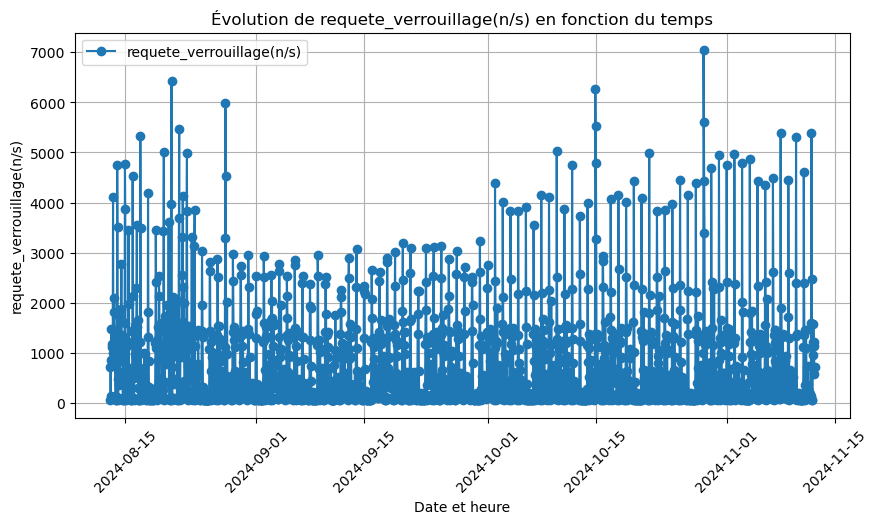

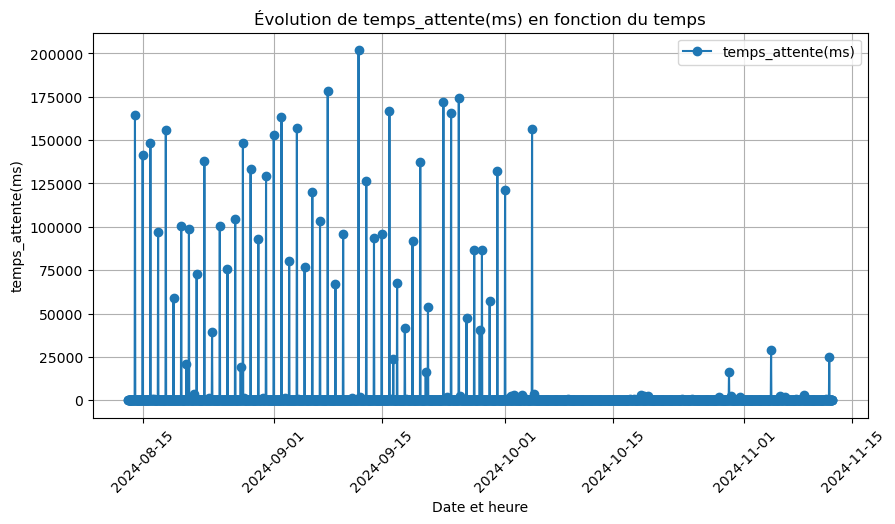

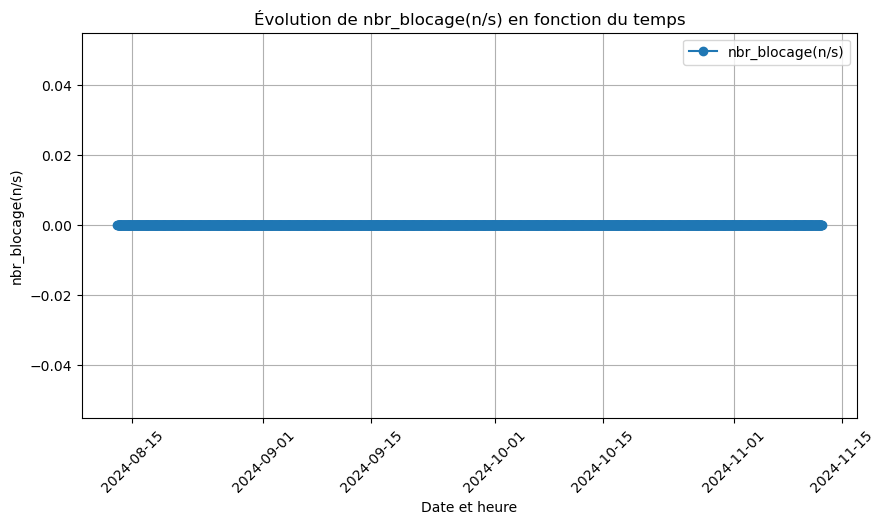

In [16]:
import matplotlib.pyplot as plt
import itertools
import pandas as pd

import matplotlib.pyplot as plt

# Vérifier que 'date_full' est bien au format datetime
tab["date_full"] = pd.to_datetime(tab["date_full"])

# Liste des colonnes à exclure
excluded_cols = ["date_full", "date", "heure", "Date et heure(RAW)"]

# Tracer chaque colonne en fonction du temps
for col in tab.columns:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(10, 5))

        plt.plot(tab["date_full"], tab[col], marker='o', linestyle='-')

        plt.xlabel("Date et heure")
        plt.ylabel(f"{col}")  # Correction de la syntaxe
        plt.title(f"Évolution de {col} en fonction du temps")
        plt.legend([col])  # Correction de la légende
        plt.xticks(rotation=45)
        plt.grid()

        plt.show()

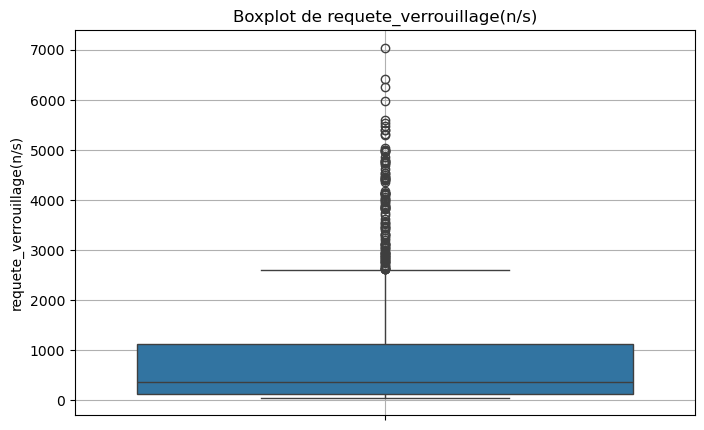

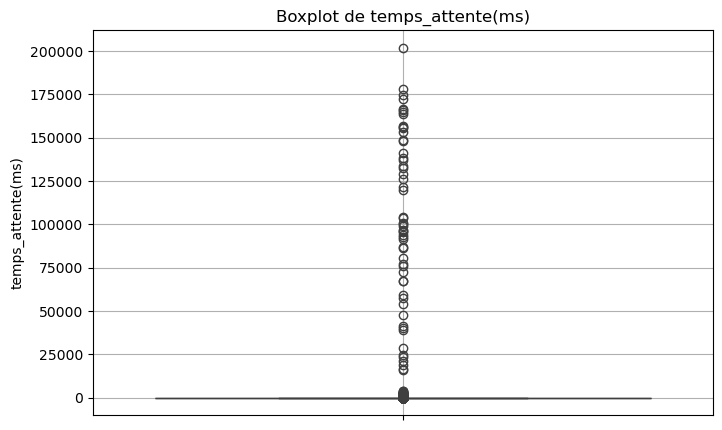

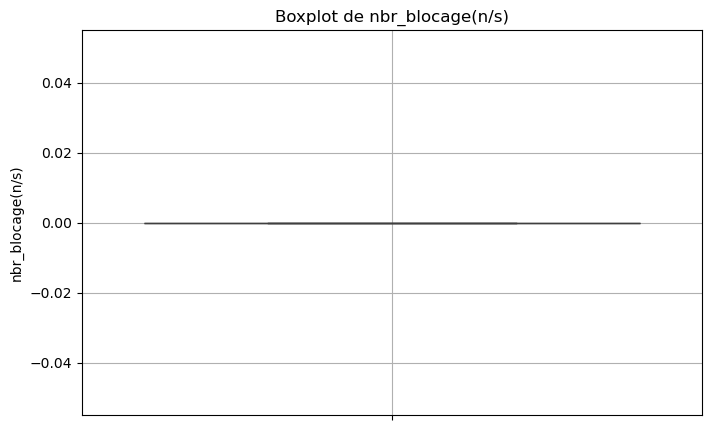

In [17]:
import seaborn as sns

# Exclure les colonnes non numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Tracer un boxplot pour chaque colonne
for col in numerical_cols:
    if col not in excluded_cols:  # Exclure les colonnes non pertinentes
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=tab[col])
        plt.title(f"Boxplot de {col}")
        plt.grid()
        plt.show()

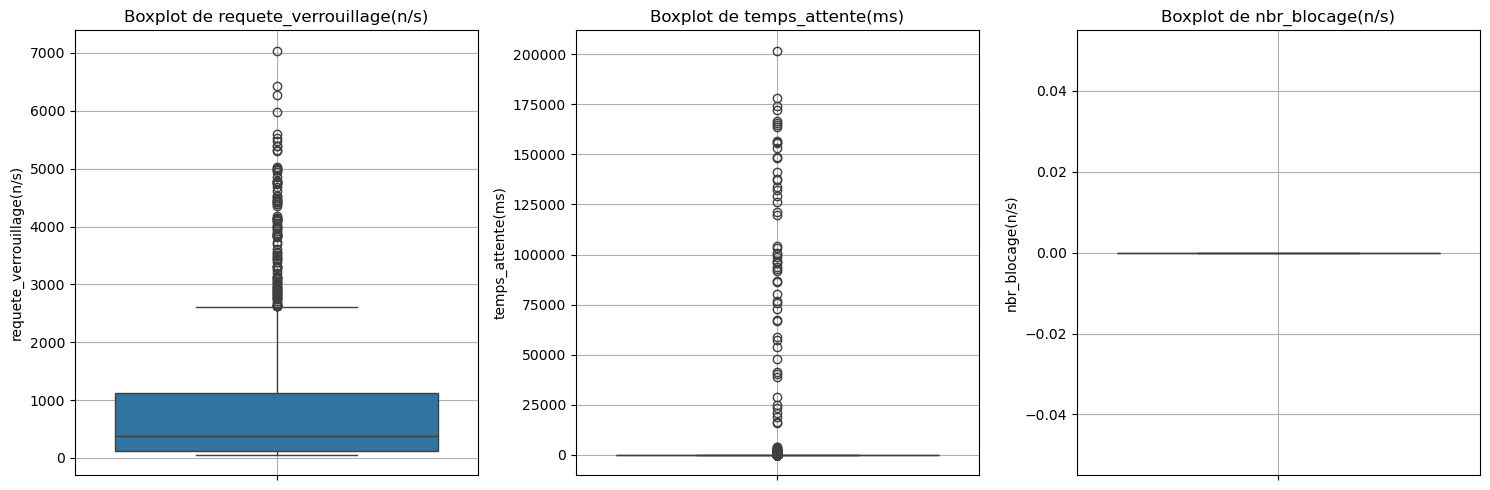

In [18]:
# Sélection des colonnes numériques
numerical_cols = tab.select_dtypes(include=['number']).columns

# Filtre pour exclure les colonnes non pertinentes
cols_to_plot = [col for col in numerical_cols if col not in excluded_cols]

rows=(math.ceil(len(cols_to_plot)/3))
# Créer une figure avec 2 lignes et 3 colonnes de sous-graphiques (axes)
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows*5))

# Convertir "axes" en un tableau 1D pour plus de flexibilité
axes = axes.flatten()

# Boucler sur les colonnes et tracer un boxplot dans chaque sous-graphique
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=tab[col], ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")
    axes[i].grid()

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [19]:
#### ATTENTION au path et nom de fichier
tab.to_csv("../data/logServer/filtered/myreport_sql_lock_filtered.csv", index=False, encoding='utf-8')

### Obsolete

## Analyse temporelle

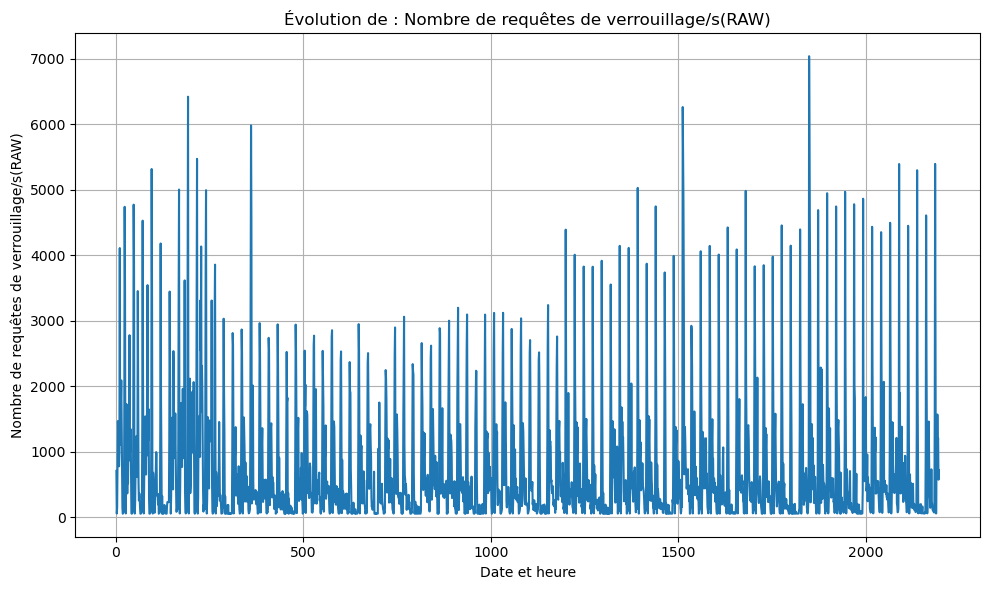

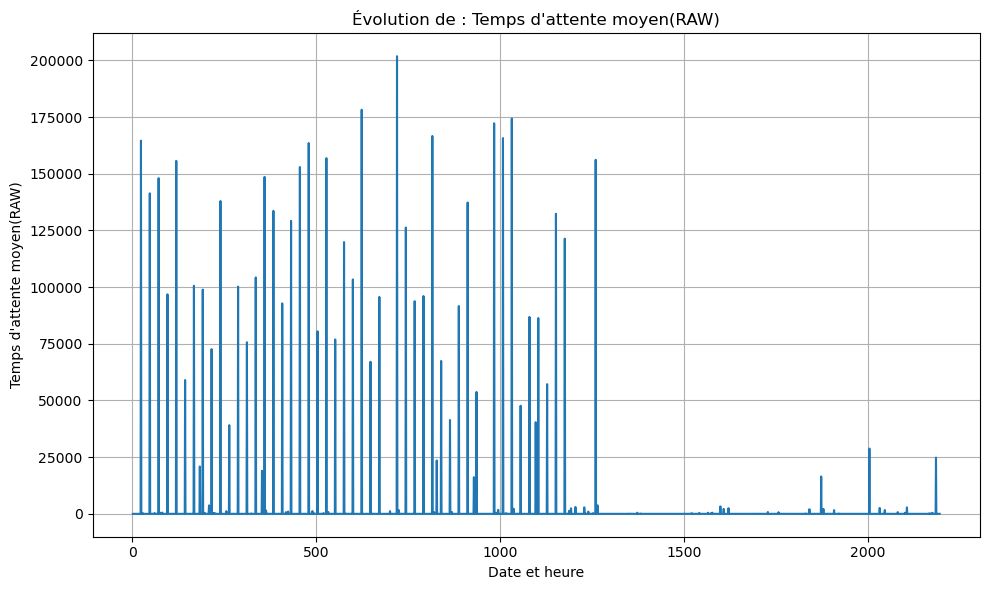

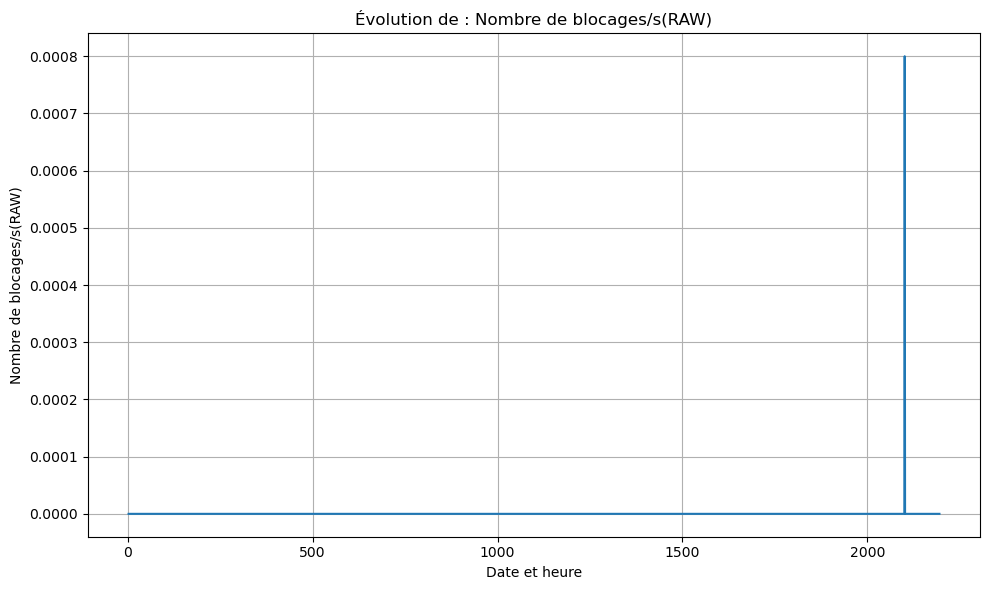

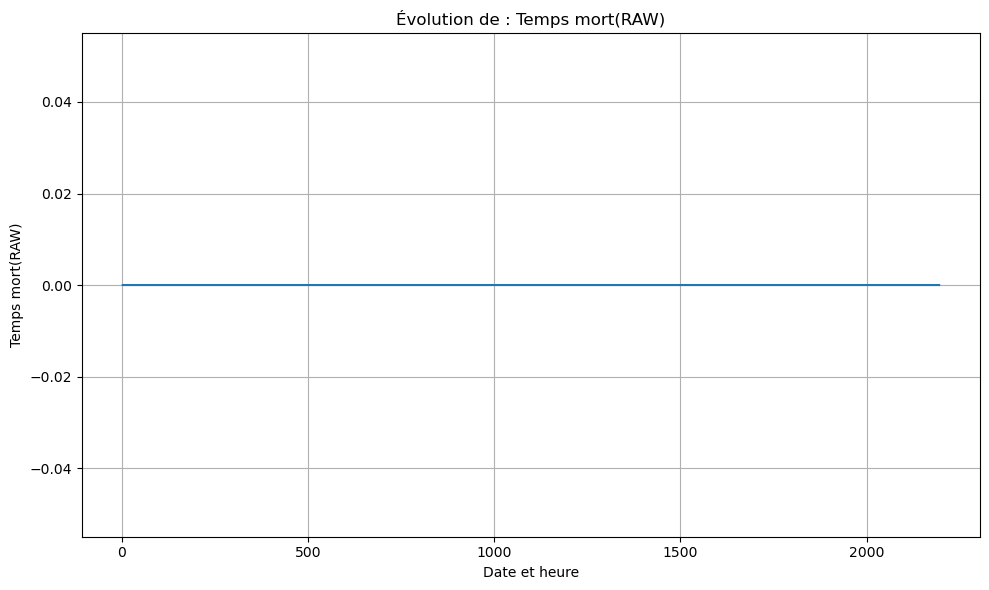

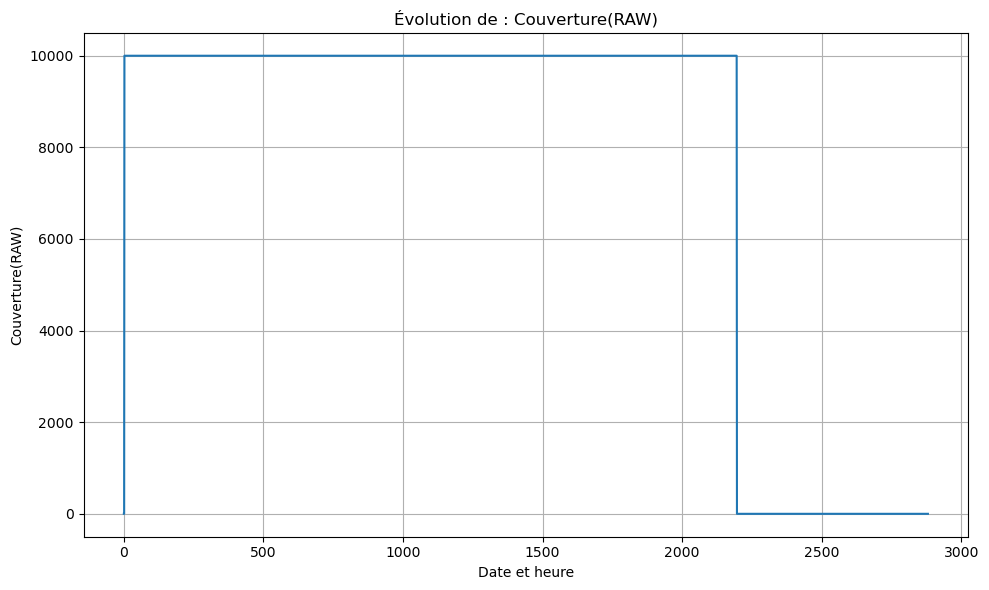

In [9]:
df=tab.copy()

# Boucle pour générer les graphiques
for col in df.columns:
    if col != 'Date et heure(RAW)' and "RAW" in col:  # Exclure la colonne 'Date et heure(RAW)'
        plt.figure(figsize=(10, 6))
        df[col].plot(kind='line', title=f'Évolution de : {col}')
        plt.xlabel('Date et heure')
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()